# PART 2: Let's Augment our Data with WURFL Device Information

Start with the dataset to without WURFL values.


In [1]:
import json
import numpy as np
import pandas as pd
import gzip
import csv

data = pd.read_csv('data_in_tsv_format.tsv.gz', compression='gzip', index_col=0, sep='\t', quoting=csv.QUOTE_NONE)


In [2]:
data.head()

,Accept,Accept-Encoding,User-Agent,Platform-User-Click,X-Ucbrowser-Ua,X-Wap-Profile,Dpr,Viewport-Width,Device-Stock-Ua,X-Operamini-Features,X-Operamini-Phone,X-Operamini-Phone-Ua
0,*/*,"gzip, deflate",Mozilla/5.0 (Linux; Android 9; HTC_U-3u Build/...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,*/*,"gzip, deflate",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"*/*, dn/29071867172-d0d5a7bd,text/vnd.wap.wml;...","gzip,deflate",UCWEB/2.0 (MIDP-2.0; U; Adr 9; en-US; Redmi_No...,0,pf(Linux);la(en-US);re(U2/1.0.0);dv(Redmi_Note...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,*/*,"gzip, deflate",Mozilla/5.0 (Linux; Android 7.0; COMIO P1 Buil...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*/*,"gzip, deflate, br",Mozilla/5.0 (Linux; Android 10; Redmi Note 8 P...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Accept                991059 non-null  object 
 1   Accept-Encoding       984824 non-null  object 
 2   User-Agent            999960 non-null  object 
 3   Platform-User-Click   999962 non-null  int64  
 4   X-Ucbrowser-Ua        13381 non-null   object 
 5   X-Wap-Profile         2056 non-null    object 
 6   Dpr                   6166 non-null    float64
 7   Viewport-Width        6166 non-null    float64
 8   Device-Stock-Ua       12264 non-null   object 
 9   X-Operamini-Features  12279 non-null   object 
 10  X-Operamini-Phone     12279 non-null   object 
 11  X-Operamini-Phone-Ua  12279 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 99.2+ MB


In [4]:
#data["User-Agent"] = data["User-Agent"].astype(str)

In [5]:
#data[["User-Agent"]].info()

In [6]:
# small differences as compared to what was saved in the previous notebook.
#data[(data["User-Agent"].isnull())]

In [7]:
# List of columns

data.columns

Index(['Accept', 'Accept-Encoding', 'User-Agent', 'Platform-User-Click',
       'X-Ucbrowser-Ua', 'X-Wap-Profile', 'Dpr', 'Viewport-Width',
       'Device-Stock-Ua', 'X-Operamini-Features', 'X-Operamini-Phone',
       'X-Operamini-Phone-Ua'],
      dtype='object')

We would like to use a couple of standard ML/IA techniquest to verify that there is not much correlation between
UA strings and users’ decision to click. 

**The User-Agent string is the most informative column available but cardinality is very high so it will be very expensive to train the model and training data will also be very sparse**.

For this reason, we are going to augment our dataset with additional device data with the WURFL API. This is what we are going to show you in the next notebook.

**IMPORTANT NOTE:** DO NOT TRY TO INSTALL PyWURFL with: `#!pip install pywurfl` 
Please obtain PyWURFL from ScientiaMobile and install it following the instruction provided from your customer vault. 
There is a conflict with a legacy PyWURFL module (outside of ScientiaMobile's control) that, if installed by mistake, should first be uninstalled for successful install of pywurfl


In [8]:
from pywurfl.wurfl import Wurfl
# Create a WURFL Engine.
wurfl = Wurfl('wurfl.zip')
# let's give it a little bit of in-memory cache
# wurfl = Wurfl( root='wurfl.zip', cache_provider=1, cache_extra_config="200000" )

static_capabilities = [ "brand_name" ,"model_name" , "release_date" , "release_msrp" ,
                       "is_smarttv" , "is_tablet" ]
virtual_capabilities = [ "is_mobile" , "is_smartphone" , "complete_device_name" ,
                        "advertised_device_os" , "advertised_device_os_version" ,"form_factor" ,
                        "is_full_desktop" ]

In [9]:
wurfl

In [10]:
http_request = {
    #"X-Operamini-Phone-Ua": str("Mozilla/5.0 (Linux; Android 7.0; itel P41 Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/59.0.3071.125 Mobile Safari/537.36"),
    "user-agent":"Mozilla/5.0 (Linux; U; Android 9; fr-dz; Redmi Note 7 Build/PKQ1.180904.001) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/61.0.3163.128 Mobile Safari/537.36 XiaoMi/MiuiBrowser/10.6.3-g"
}

dev = wurfl.parse_headers(http_request)
capa_values = dev.get_capabilities(static_capabilities)
capa_values.update(dev.get_virtual_capabilities(virtual_capabilities))
#print(capa_values)
dev.release()
new_columns = list(capa_values.keys())
new_columns

['brand_name',
 'model_name',
 'release_date',
 'release_msrp',
 'is_smarttv',
 'is_tablet',
 'is_mobile',
 'is_smartphone',
 'complete_device_name',
 'advertised_device_os',
 'advertised_device_os_version',
 'form_factor',
 'is_full_desktop']

In [11]:
#datasmall = data[0:2000]

In [12]:
#datasmall.info()

**Be careful before you run the next cell. One milion rows. It might take a while (ballpark: 5-20 mins)**

In [13]:
cols = data.columns.to_list()
cols.remove("User-Agent")

#def ua_to_json(accept_encoding, accept, user_agent):
def get_wurfl_capas(row):
    
    if pd.isna(row['User-Agent']):
        user_agent = ""
    else:
        user_agent = row['User-Agent']
        
    http_request = {
        "user-agent": user_agent,
    }
    
    #add all non-null headers to mock HTTP request
    for el in cols:
        if not pd.isna(row[el]):
            http_request[el] = str(row[el])
    
    
    dev = wurfl.parse_headers(http_request)
    capa_values = dev.get_capabilities(static_capabilities)
    capa_values.update(dev.get_virtual_capabilities(virtual_capabilities))
    
    dev.release()
    #print(capa_values, flush=True)
    return pd.Series(capa_values)


# an advice is to run on sample of data     
data[new_columns] = data.apply(get_wurfl_capas, axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Accept                        991059 non-null  object 
 1   Accept-Encoding               984824 non-null  object 
 2   User-Agent                    999960 non-null  object 
 3   Platform-User-Click           999962 non-null  int64  
 4   X-Ucbrowser-Ua                13381 non-null   object 
 5   X-Wap-Profile                 2056 non-null    object 
 6   Dpr                           6166 non-null    float64
 7   Viewport-Width                6166 non-null    float64
 8   Device-Stock-Ua               12264 non-null   object 
 9   X-Operamini-Features          12279 non-null   object 
 10  X-Operamini-Phone             12279 non-null   object 
 11  X-Operamini-Phone-Ua          12279 non-null   object 
 12  brand_name                    999962 non-nul

In [15]:
# df_nowurfl = df_nowurfl.reset_index()
# df_nowurfl_enriched = df_nowurfl.merge(pd.json_normalize(df_nowurfl['enriched_json']), left_index=True, right_index=True)
# df_nowurfl_enriched.columns

## now we will enter into the 2nd part of the problem where we have the wurfl api enriched data

In [16]:
# df_wurfl = pd.DataFrame(final_json_list)
# df_wurfl

In [17]:
data.columns

Index(['Accept', 'Accept-Encoding', 'User-Agent', 'Platform-User-Click',
       'X-Ucbrowser-Ua', 'X-Wap-Profile', 'Dpr', 'Viewport-Width',
       'Device-Stock-Ua', 'X-Operamini-Features', 'X-Operamini-Phone',
       'X-Operamini-Phone-Ua', 'brand_name', 'model_name', 'release_date',
       'release_msrp', 'is_smarttv', 'is_tablet', 'is_mobile', 'is_smartphone',
       'complete_device_name', 'advertised_device_os',
       'advertised_device_os_version', 'form_factor', 'is_full_desktop'],
      dtype='object')

# Explain each column meaning to show metadata description

In [18]:
data['Platform-User-Click'].value_counts()

0    987951
1     12011
Name: Platform-User-Click, dtype: int64

In [19]:
data.shape

(999962, 25)

In [20]:
data['Platform-User-Click'].value_counts(normalize=True)*100

0    98.798854
1     1.201146
Name: Platform-User-Click, dtype: float64

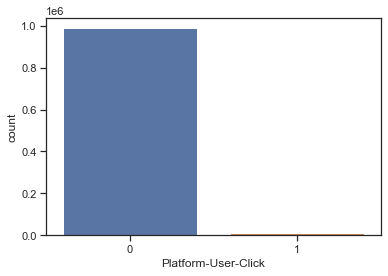

In [21]:
import seaborn as sns
sns.set(style="ticks")
ax = sns.countplot(x="Platform-User-Click", data=data)

In [22]:
data['release_msrp'] = data["release_msrp"].astype(int)

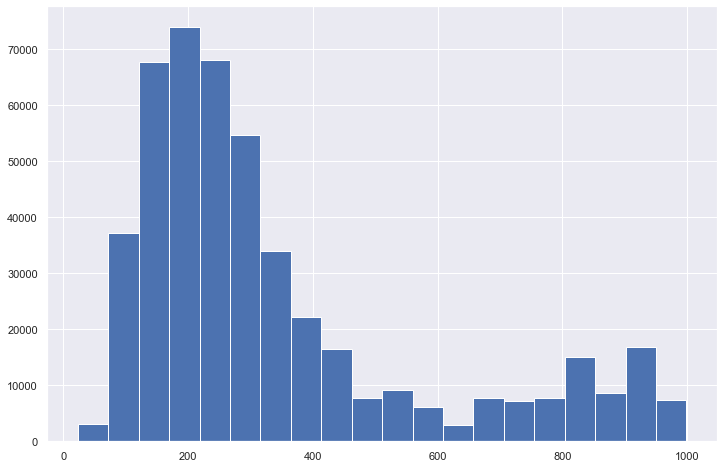

In [23]:
#sns.histplot(data=data[(data["release_msrp"] > 1) & (data["release_msrp"] < 1000)], x="release_msrp");
prices = data[(data["release_msrp"] > 1) & (data["release_msrp"] < 1000)]["release_msrp"]
plt.hist(prices, bins=20);

In [24]:
data['release_msrp'].value_counts()

0       353993
1150    131957
849      12494
240      11671
198       8653
         ...  
537          1
463          1
814          1
44           1
902          1
Name: release_msrp, Length: 661, dtype: int64

In [25]:
data['brand_name'].value_counts(normalize=True)*100

Google         22.100940
Apple          19.872955
Samsung        16.444425
Xiaomi          7.802296
Huawei          4.374066
                 ...    
Brandcode       0.000100
Gear Mobile     0.000100
Au              0.000100
KingSing        0.000100
iOcean          0.000100
Name: brand_name, Length: 368, dtype: float64

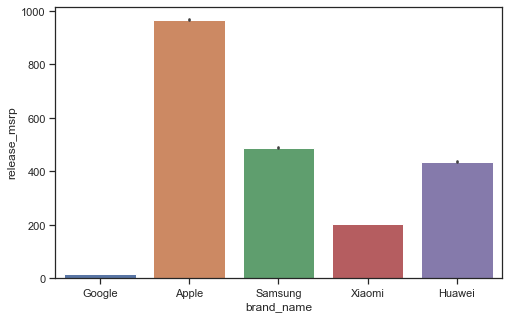

In [26]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
ax = sns.barplot(x="brand_name", y="release_msrp", data=data,
                 order=["Google", "Apple","Samsung","Xiaomi","Huawei"])

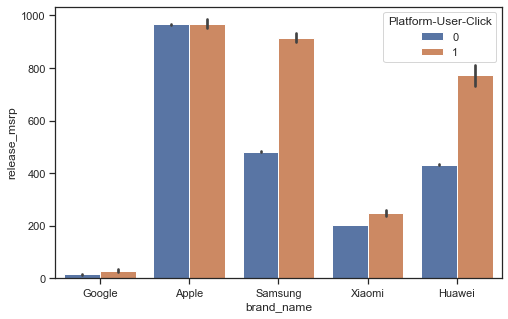

In [27]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="brand_name", y="release_msrp", hue="Platform-User-Click", data=data,
                 order=["Google", "Apple","Samsung","Xiaomi","Huawei"])

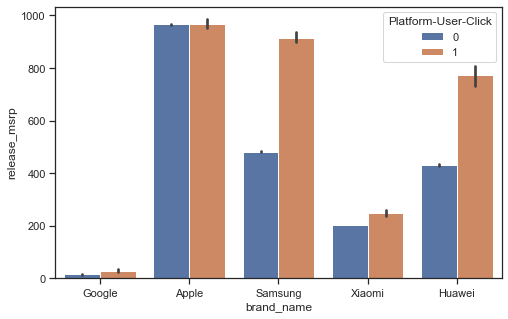

In [28]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="brand_name", y="release_msrp", hue="Platform-User-Click", data=data,
                 order=["Google", "Apple","Samsung","Xiaomi","Huawei"])

In [29]:
data['advertised_device_os'].value_counts(normalize=True)*100

Android                                  49.430278
Windows                                  25.628674
iOS                                      16.582530
macOS                                     4.527572
Linux                                     1.339551
                                          1.180845
iPadOS                                    0.500219
Mac OS X                                  0.350613
Chrome OS                                 0.208308
Fire OS                                   0.103804
KaiOS                                     0.051102
Tizen                                     0.027901
Windows Phone                             0.019501
PlayStation OS                            0.017501
Ubuntu                                    0.010100
Nintendo                                  0.009300
Fedora                                    0.004000
Symbian S60                               0.003000
BlackBerry                                0.001900
Intel Mac OS X                 

In [30]:
data["OS_and_Ver"] = data["advertised_device_os"] + " " + data["advertised_device_os_version"]

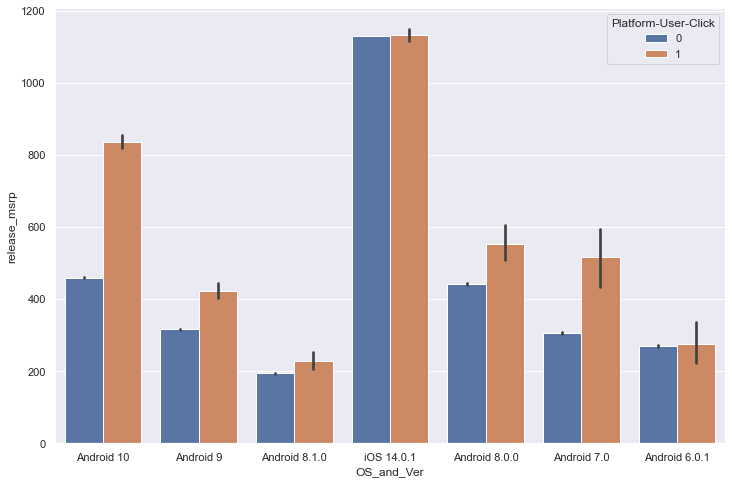

In [31]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x="OS_and_Ver", y="release_msrp", hue="Platform-User-Click", data=data,
                 order=["Android 10","Android 9","Android 8.1.0", "iOS 14.0.1", # "iOS 13.7",
                        "Android 8.0.0","Android 7.0","Android 6.0.1"]) #,"Windows 10","Windows 7"])

In [32]:
data['release_date'].value_counts(normalize=True).head(30).sum()

0.8011104421968033

In [33]:
data['release_date'].value_counts(normalize=True).head(30)

2019_december     0.202276
2017_june         0.146712
2019_september    0.040956
2013_june         0.037958
2020_january      0.036176
2019_march        0.033002
2014_december     0.026538
2018_may          0.019991
2018_october      0.019940
2019_april        0.018237
2019_may          0.016519
2019_february     0.015292
2019_october      0.013539
2017_september    0.013222
2016_november     0.011556
2017_december     0.011471
2018_march        0.011326
2018_june         0.011111
2018_september    0.010508
2020_march        0.010407
2018_august       0.010243
2016_march        0.010173
2018_july         0.010102
2018_february     0.010051
2019_june         0.009542
2018_november     0.009307
2018_april        0.009138
2016_august       0.008787
2017_april        0.008771
2016_september    0.008256
Name: release_date, dtype: float64

In [34]:
data[['year','month']] = data['release_date'].str.split("_", expand=True)

In [35]:
data['year'].value_counts()

2019    374442
2017    218747
2018    130989
2020     76686
2016     64118
2013     42592
2014     36745
2015     27386
2012     10665
2000      6993
2002      5441
2011      1260
1994      1136
2006       949
2003       727
2007       548
2009       279
2010       130
2001        96
2008        31
2005         2
Name: year, dtype: int64

In [36]:
data['month'].value_counts()

december     248702
june         227321
september     83377
march         75249
january       72732
october       54388
may           52333
april         47072
august        37959
february      35278
november      34114
july          31437
Name: month, dtype: int64

In [37]:
pd.crosstab(data['month'], data['Platform-User-Click'], normalize='index').sort_values(by=[1], ascending=False)*100

Platform-User-Click,0,1
month,,
march,97.670401,2.329599
august,98.034722,1.965278
september,98.276503,1.723497
december,98.832740,1.167260
april,98.865568,1.134432
january,98.919320,1.080680
may,98.985344,1.014656
june,99.064759,0.935241
october,99.141355,0.858645


In [38]:
pd.crosstab(data['year'], data['Platform-User-Click'], normalize='index').sort_values(by=[1], ascending=False)*100

Platform-User-Click,0,1
year,,
2020,97.695798,2.304202
2019,98.310286,1.689714
2002,98.713472,1.286528
2000,98.741599,1.258401
2013,98.908246,1.091754
2001,98.958333,1.041667
2014,99.020275,0.979725
2012,99.024848,0.975152
1994,99.031690,0.968310


In [39]:
pd.crosstab(data['release_date'], data['Platform-User-Click'], normalize='index').sort_values(by=[1], ascending=False)*100

Platform-User-Click,0,1
release_date,,
2019_august,93.233372,6.766628
2020_august,93.631948,6.368052
2020_march,94.465264,5.534736
2020_october,95.000000,5.000000
2011_may,96.428571,3.571429
...,...,...
2010_november,100.000000,0.000000
2010_october,100.000000,0.000000
2012_july,100.000000,0.000000


Removing columns where majority of the values are null

1) X-Ucbrowser-Ua

2) X-Wap-Profile

3) Dpr

4) Viewport-Width

5) Device-Stock-Ua

6) X-Operamini-Features

7) X-Operamini-Phone

8) X-Operamini-Phone-Ua

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Accept                        991059 non-null  object 
 1   Accept-Encoding               984824 non-null  object 
 2   User-Agent                    999960 non-null  object 
 3   Platform-User-Click           999962 non-null  int64  
 4   X-Ucbrowser-Ua                13381 non-null   object 
 5   X-Wap-Profile                 2056 non-null    object 
 6   Dpr                           6166 non-null    float64
 7   Viewport-Width                6166 non-null    float64
 8   Device-Stock-Ua               12264 non-null   object 
 9   X-Operamini-Features          12279 non-null   object 
 10  X-Operamini-Phone             12279 non-null   object 
 11  X-Operamini-Phone-Ua          12279 non-null   object 
 12  brand_name                    999962 non-nul

At 261 Mb of memory, our dataset is pretty large. We are at the point where we can drop a lot of columns though. While that information was relevant for initial analysis and to activate device detection, we can now drop it.

In [41]:
import csv

data.to_csv("data_plus_wurflcapas_in_tsv_format.tsv.gz", sep="\t", quoting=csv.QUOTE_NONE, compression='gzip')

In [42]:
data = data.drop(['X-Ucbrowser-Ua', 'X-Wap-Profile','Dpr','Viewport-Width','Device-Stock-Ua','X-Operamini-Features',
         'X-Operamini-Phone','X-Operamini-Phone-Ua'], axis=1)

Also removing columns like 
1) Accept
2) Accept-Encoding

As it contains values where there is no variation in values

In [43]:
data = data.drop(['Accept','Accept-Encoding'], axis=1)

`User-Agent` strings can also be removed as WURFL has already enriched the data.

In [44]:
data = data.drop(['User-Agent'], axis=1)

Let's save this as a TSV file. This file will be the input to the next notebook, the one where we start doing Machine learning.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999962 entries, 0 to 999961
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Platform-User-Click           999962 non-null  int64 
 1   brand_name                    999962 non-null  object
 2   model_name                    999962 non-null  object
 3   release_date                  999962 non-null  object
 4   release_msrp                  999962 non-null  int32 
 5   is_smarttv                    999962 non-null  object
 6   is_tablet                     999962 non-null  object
 7   is_mobile                     999962 non-null  object
 8   is_smartphone                 999962 non-null  object
 9   complete_device_name          999962 non-null  object
 10  advertised_device_os          999962 non-null  object
 11  advertised_device_os_version  999962 non-null  object
 12  form_factor                   999962 non-null  object
 13 

Let's save our data to make it easily available in the next notebook.

In [46]:
import csv

data.to_csv("data_only_wurflcapas_in_tsv_format.tsv.gz", sep="\t", quoting=csv.QUOTE_NONE, compression='gzip')